### MADRID CHOROPLETH MAP.
#### MADRID "BARRIOS" OCCUPANCY RATE IN AIRBNB

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep

from matplotlib.collections import PatchCollection

import json
import geopandas as gdp
from geopandas import GeoSeries, GeoDataFrame


In [133]:
%cd ~/Master-IV/PROYECTO_FM/

/home/dsc/Master-IV/PROYECTO_FM


In [2]:
center=pd.read_csv('center.csv',encoding='utf8')
neig=center.groupby('neighborhood',as_index=False).availability_30.mean()

In [3]:
neig.rename(columns={'neighborhood':'NOMBRE'},inplace=True)

In [4]:
barrios = list(center.neighborhood.unique())


In [5]:
%cd ~/Master-IV/PROYECTO_FM/SHP_ETRS89/

/home/dsc/Master-IV/PROYECTO_FM/SHP_ETRS89


Chororpleth maps require a shapefile format. We found a shp file of Madrid barrios [here](http://www.madrid.org/nomecalles/DescargaBDTCorte.icm)

There is a copy of the file in the datasets [folder](https://github.com/penadorada/TFM/tree/master/Datasets)

In [6]:
tmp = gdp.GeoDataFrame.from_file('Barrios.shp',encoding='utf8')# file in dataset folder
tmp.shape

(129, 9)

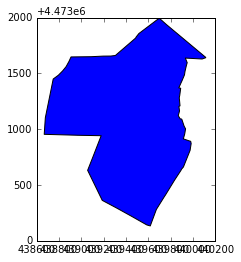

In [7]:
h = tmp[tmp.geometry.within(tmp.ix[0].geometry)]
h.plot()
plt.show()

In [8]:
tmpW = tmp.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
tmpW.to_file('zonas.shp')

In [9]:
y = tmpW.merge(neig,on='NOMBRE',how='left')
y.head()

,OBJECTID,NOMDIS,CODBAR,CODDISTRIT,CODBARRIO,NOMBRE,Shape_area,Shape_len,geometry,availability_30
0,1,Centro,011,01,1-1,Palacio,1.469906e+06,5754.828214,"POLYGON ((-3.70593068010655 40.42028737682206,...",8.538457
1,2,Centro,012,01,1-2,Embajadores,1.033724e+06,4275.226734,"POLYGON ((-3.691939911799033 40.4090820676157,...",7.222508
2,3,Centro,013,01,1-3,Cortes,5.918743e+05,3731.081263,POLYGON ((-3.698049248131651 40.41927625322897...,7.811384
3,4,Centro,014,01,1-4,Justicia,7.394140e+05,3597.421076,POLYGON ((-3.695761797894772 40.42764204100443...,9.444968
4,5,Centro,015,01,1-5,Universidad,9.480267e+05,4060.075534,"POLYGON ((-3.71186151904821 40.43019424561017,...",7.418013


In [10]:
y['availability_30'] = y.availability_30.fillna(30)

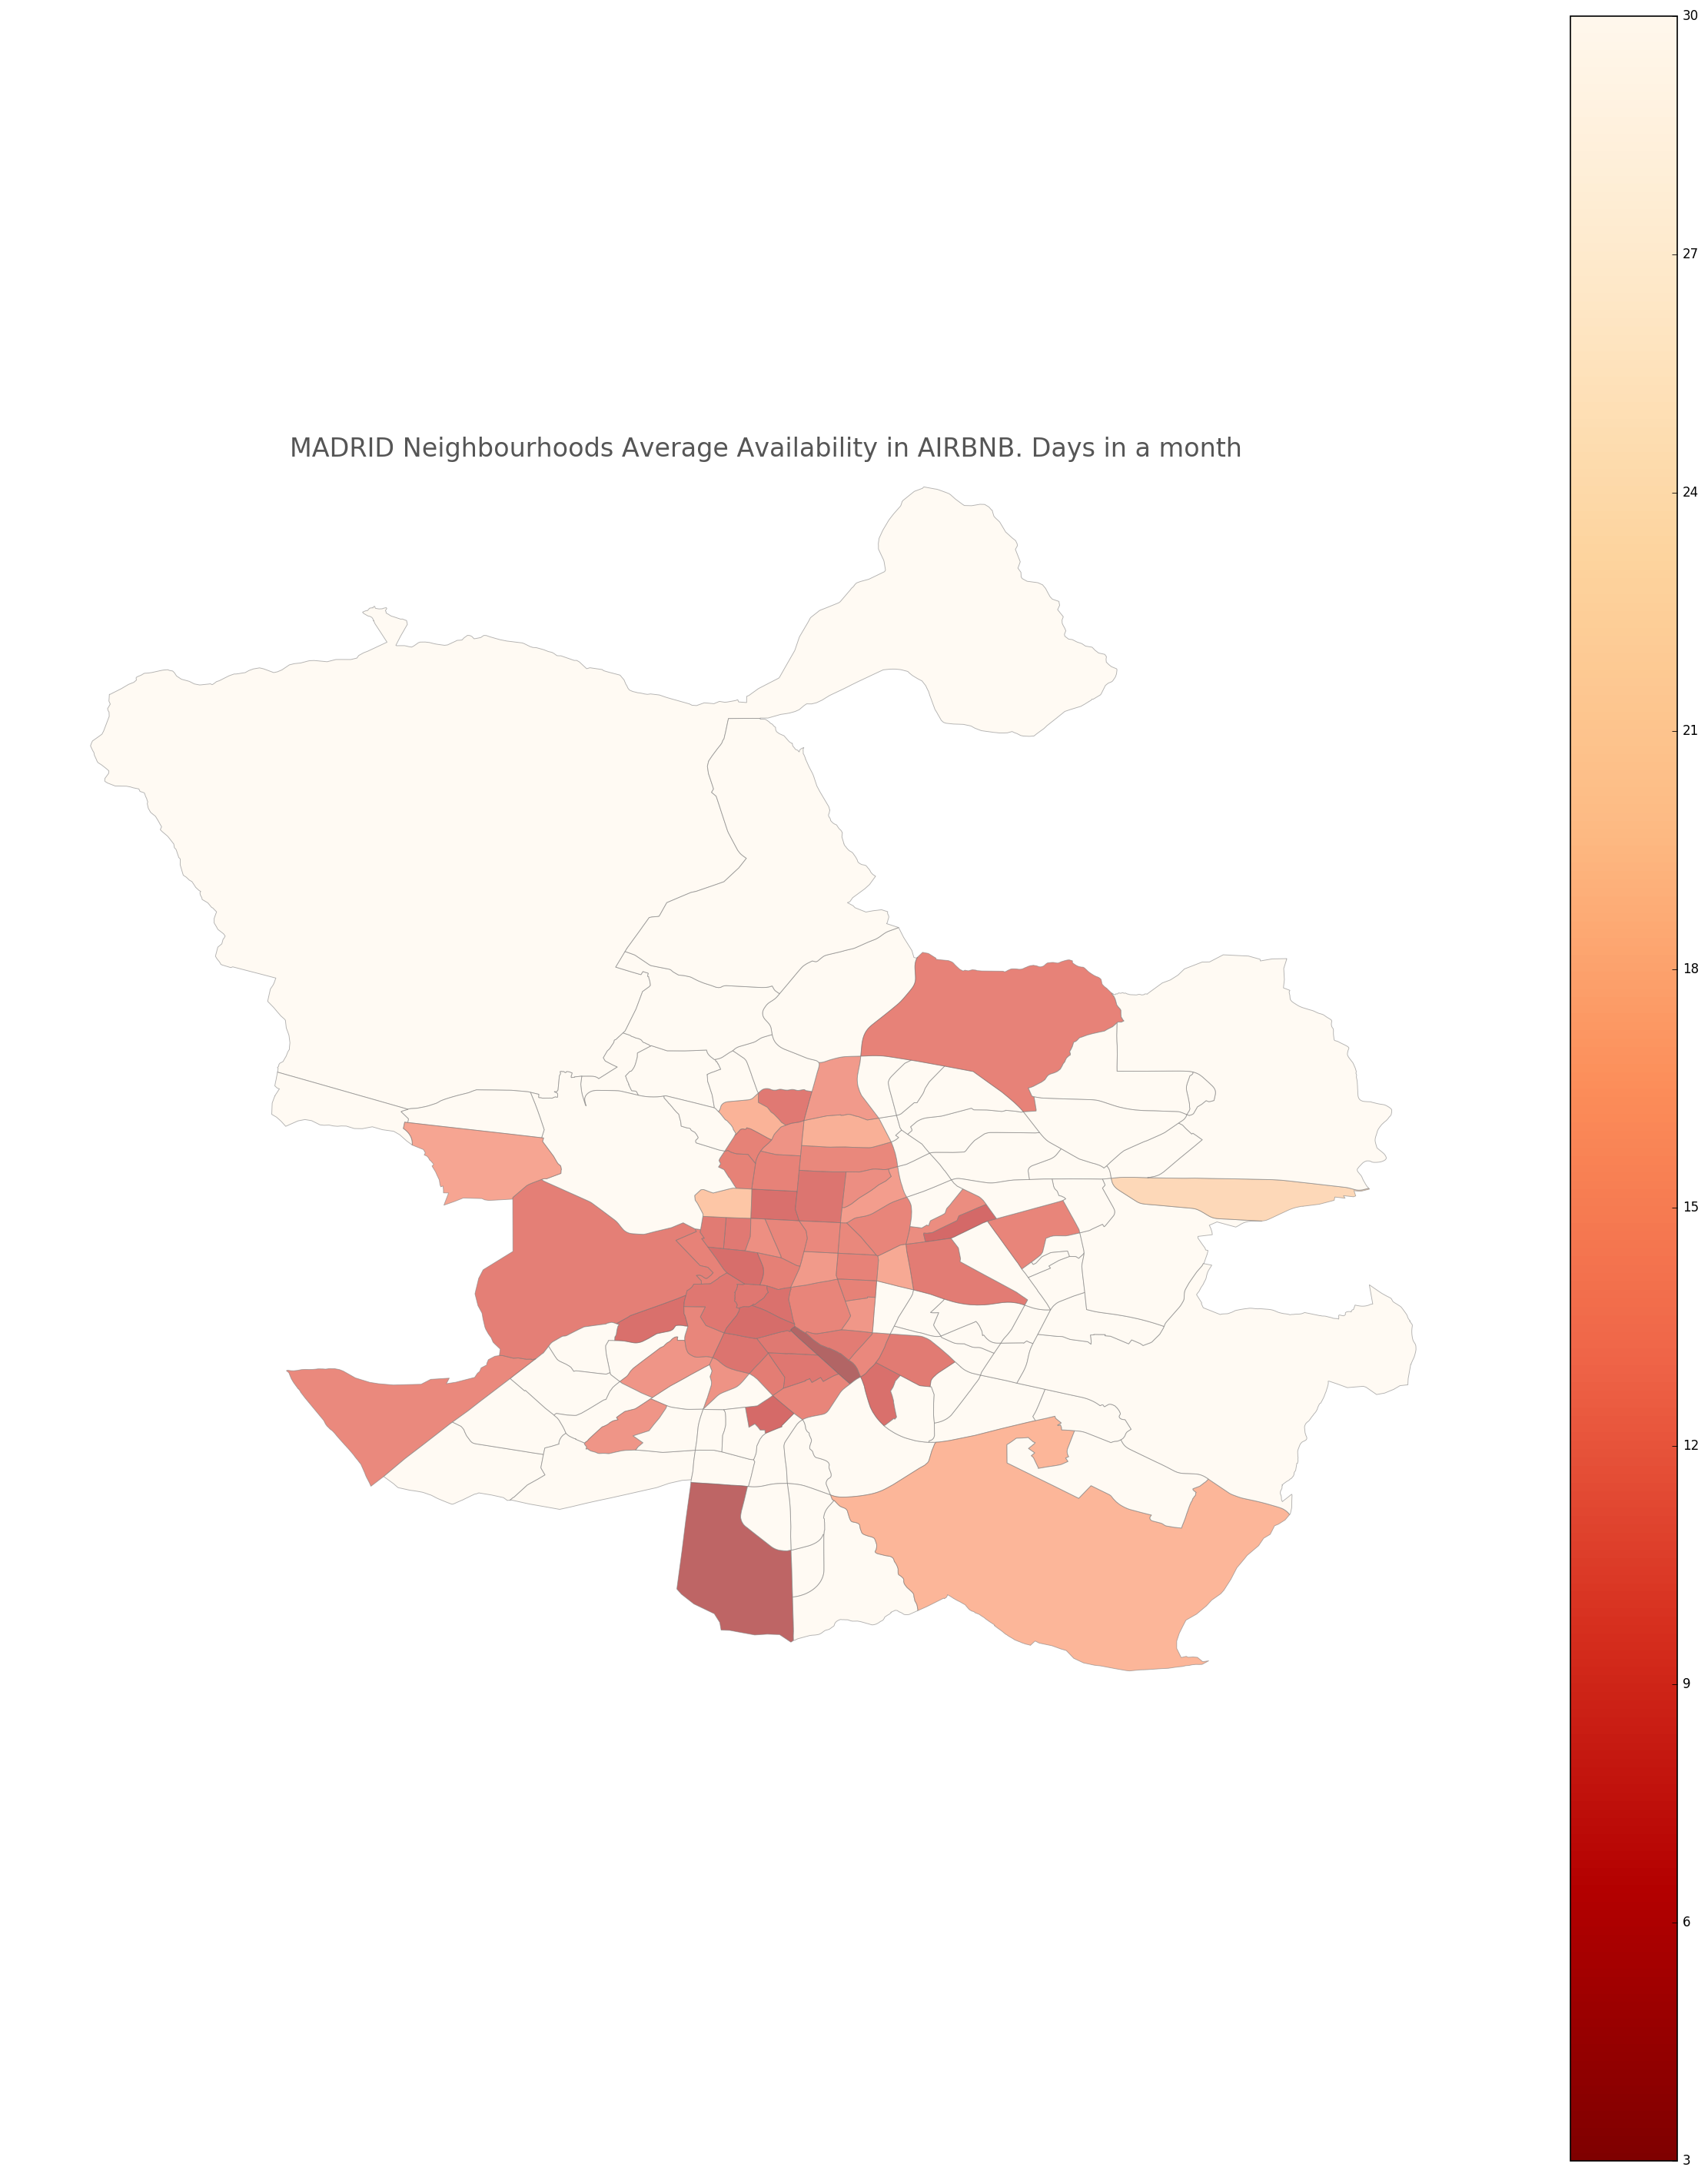

In [11]:
# PLot choropleth map
plt.clf()
fig, ax = plt.subplots(
    1,
    figsize=(25, 30),
    dpi=120,
    subplot_kw=dict(aspect='equal'),
)

base = y.plot(
    ax=ax,
    alpha=0.6,
    column='availability_30',
    k=5,
    cmap="OrRd_r",
    linewidth=0.55,
    edgecolor='grey',
    legend=True,
)

_ = ax.axis('off')

ax.set_title("MADRID Neighbourhoods Average Availability in AIRBNB. Days in a month", color='#555555',size=20)
plt.show()
plt.savefig('chomad1.png',bbox_inches='tight')